In [ ]:
https://kroki.io/mermaid/svg/eNp1k81u2zAQhO95ij0VCWAjsJ1cfChgK05R1KkBJ0EPhA4UtZKJSqRBSqndpy9_HVFNfDHA-TTYHQ5rRY8H2O6vwPxWZEtF_c0e5TCdfoX1dSYVQiYFw2On4Qs8Iu16hfrGf-Co7PqBVxUqNJSGSskWrE92oFzcXDlw7e1mxJlP11RjCZsTsr7jUuRDZk5-4BnWKLDinU6kBclke5QChRW8MgvOlPyUJeolPPaCWVN9-yTLvkF96waJTpEvyKasLf-iqNDcfTFCGMnOrLHM3gyq9PukkSjJc0c7hCcqaI2tmSuONQ_LUPJLqt9VI__ATrED6k7RwcoRKz4wSgBGHs6CtpzBXprMRD3SS7IrNKo3WvCGd-eRisRlQZWTvLYImVJ_J-AGyFOt8KGOTpmPbnRamssRZQzSaZmvx4ysCru3uxbY4hs2-VCfm-VVz2yvTMN2qqaC_x2kFLDFJxkF-Y68alNV0yydnN_70mhaNAgb0ZkJ8TLgLExIyaWxSwhZwbBsCV28v5Pl-Fo9OQ-bJb7ub5oZQ8VZnoKJpX8kF9CTi5BCYvm9PTac8ZhEZBK3zSkyHroLeSVGz9w4IQyfygVM3GwoDZ4g1voS5X2I-_-V9QRWtY1xAi9SNtE-fpDYu75NwBVsEjr5D2gbWTg

In [2]:
from langchain_core.runnables import RunnablePassthrough

langchain_chain = RunnablePassthrough() | (lambda x: x['input'].lower())

print(langchain_chain.invoke({"input": "Olá"}))

olá


In [42]:
from langgraph.graph import StateGraph
from typing import TypedDict

class SimpleState(TypedDict):
    input: str
    result: str

workflow = StateGraph(SimpleState)

# Define nodes
def lowercase(state):
    return {"result": state['input'].lower()}

def formating(state):
    return {"result": f"The final result is: {state['result']}"}

# Add nodes to graph
workflow.add_node("preprocessor", lowercase)
workflow.add_node("finalizer", formating)

# Connect nodes in sequence
workflow.add_edge("preprocessor", "finalizer")

# Set entry/exit points
workflow.set_entry_point("preprocessor")

app = workflow.compile()

result = app.invoke({"input": "Hello"})
print(result)

{'input': 'Hello', 'result': 'O resultado final é: hello'}


In [32]:
from langgraph.graph import StateGraph
from langchain_core.prompts import PromptTemplate
from langchain_community.document_loaders import WebBaseLoader
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

class workflow_state(dict):
    input: str
    document: str
    summary: str
    output: str

llm = ChatOpenAI(model="gpt-4o")

# Create graph
workflow = StateGraph(workflow_state)

# Define nodes
def load_document(state):
    document = WebBaseLoader(state["input"]).load()
    return {"document": document}

def prompt_chain(prompt,input):
    chain = (PromptTemplate.from_template(prompt) | llm | (lambda x: x.content))
    return chain.invoke(input)

def summarize_text(state):
    doc = state['document']
    summary = prompt_chain("Please summarize this: {doc}",doc[0].page_content)
    return {"summary": summary}

def generate_questions(state):
    summary = state['summary']
    questions = prompt_chain("Please generate 3 questions about this summary: {summary}" ,summary)
    return {"output": questions}

# Add nodes to graph
workflow.add_node("loader", load_document)
workflow.add_node("summarizer", summarize_text)
workflow.add_node("question_gen", generate_questions)

# Create linear flow
workflow.add_edge("loader", "summarizer")
workflow.add_edge("summarizer", "question_gen")

# Set entry/exit points
workflow.set_entry_point("loader")

# Compile and run
basic_flow = workflow.compile()


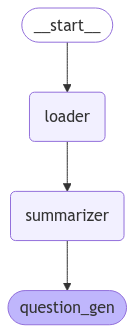

In [36]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        basic_flow.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [39]:
result = basic_flow.invoke({"input": "https://www.langchain.com/langgraph"})

print(result["input"])
print(result["document"])
print(result["summary"])
print(result["output"])

https://www.langchain.com/langgraph
[Document(metadata={'source': 'https://www.langchain.com/langgraph', 'title': 'LangGraph', 'description': 'Build controllable agents with LangGraph, our low-level agent orchestration framework. Deploy and scale with LangGraph Platform, with APIs for state management, a visual studio for debugging, and multiple deployment options.', 'language': 'en'}, page_content='LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nProducts\n\nLangChainLangSmithLangGraphMethods\n\nRetrievalAgentsEvaluationResources\n\nBlogCustomer StoriesLangChain AcademyCommunityExpertsChangelogLLM Evaluations GuideState of AI AgentsBreakout Agent StoriesDocs\n\nPythonLangChainLangSmithLangGraphJavaScriptLangChainLangSmithLangGraphCompany\n\nAboutCareersPricing\n\nLangSmithLangGraph PlatformGet a demoSign upBalance agent control with agencyGain control with LangGraph to design agents that reliably handle complex tasks. Build and scale agentic applications with LangGraph Platform.Ge